# ClassificationUsingNeuralNetworks_MultiDigitNumbers

Data Set Provided

 https://drive.google.com/file/d/1PEXoZmxT1MH9AuatTG4JuuzjcCU0Q2oS/view?usp=sharing

# Context:
A Recognising multi-digit numbers in photographs captured at street level is an 
important component of modern-day map making. A classic example of a corpus of such street-level 
photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree 
panoramic images. 
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the 
transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of 
the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the 
optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text 
recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the 
visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and 
character arrangements. 
The recognition problem is further complicated by environmental factors such as lighting, shadows, 
specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. 
In this project, we will use the dataset with images centred around a single digit (many of the images do 
contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more 
complex than MNIST because of the distractors.

# About the Data:
The SVHN is a real-world image dataset for developing machine learning and object 
recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, 
unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from 
house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: http://
docs.h5py.org/en/stable/high/dataset.html
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading 
Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and 
Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

# Legend

 ### Insights/inferences/results have been displayed post each step

In [7]:
# Useful Setting

## 1.0 EDA 

### 1.1 Import necessary libraries

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

In [9]:
# Useful Configuration/Setting

In [10]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

### 1.2 Read the data as a data frame & make a copy of DS

In [11]:
# Read The Data Set
#signalDataDSOrig = pd.read_csv("../DataSet_Storage/SignalData_DontModify.csv")
#signalDataDS=signalDataDSOrig.copy()
#signalDataDS.head(5)
import h5py
imageDataFile = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [12]:
list(imageDataFile.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [13]:
# Lets store in respective variables 
X_Train=imageDataFile['X_train']
X_Test=imageDataFile['X_test']
X_Val=imageDataFile['X_val']

Y_Train=imageDataFile['y_train']
Y_Test=imageDataFile['y_test']
Y_Val=imageDataFile['y_val']

### 1.3 Check Shape


In [14]:
# Lets look at all the shapes 
X_Train.shape
X_Test.shape
X_Val.shape

Y_Train.shape
Y_Test.shape
Y_Val.shape

(42000, 32, 32)

(18000, 32, 32)

(60000, 32, 32)

(42000,)

(18000,)

(60000,)

### 1.4 Get information about the features/columns

In [15]:
# What is the data type of elemtns aoctained in X_Train and simialrly others
X_Train.dtype
X_Test.dtype
X_Val.dtype
Y_Train.dtype
Y_Test.dtype
Y_Val.dtype

# What is the type of X_Train and simialrly others
type(X_Train)
type(Y_Train)

dtype('<f4')

dtype('<f4')

dtype('<f4')

dtype('uint8')

dtype('uint8')

dtype('uint8')

h5py._hl.dataset.Dataset

h5py._hl.dataset.Dataset

###  1.5 Lets view the data/Images

Label: 6


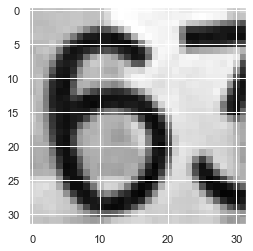

In [16]:
#Lets choose some random data and view it 
print("Label: {}".format(Y_Train[1]))
plt.imshow(X_Train[1], cmap='gray')

In [17]:
Y_Train[1]
X_Train[1]

6

array([[ 86.9591,  87.0685,  88.3735,  88.2272,  87.0424,  88.0746,
         89.0637,  89.6399,  87.6401,  87.4121,  88.1239,  96.2632,
        105.2515, 106.7306, 106.2037, 105.6598, 104.8386, 105.0281,
        103.224 , 102.8003, 101.2627, 102.7248, 100.2951, 100.3813,
        102.3811, 103.0436, 102.8695, 103.2994, 101.9144,  91.8014,
         89.7477,  92.5302],
       [ 86.688 ,  86.9114,  87.4337,  88.1517,  88.9236,  88.6508,
         89.2639,  89.324 ,  87.2442,  87.5431,  87.922 ,  95.2293,
        105.2884, 106.4425, 105.9587, 105.5288, 103.5829, 103.9465,
        103.3703, 102.4736, 102.0499, 103.3379, 102.8048, 103.4287,
        105.6134, 106.2282, 105.0003, 103.4735, 102.5337,  90.7306,
         87.204 ,  88.5629],
       [ 85.9654,  85.8145,  85.9239,  87.386 ,  88.7988,  88.1948,
         89.4658,  89.7647,  87.6509,  86.5092,  84.6064,  92.6748,
        102.19  , 104.441 , 106.6257, 106.2344, 103.7185, 102.0068,
        102.8326, 103.7616, 103.8047, 104.8046,  98.7882, 

Label: 7


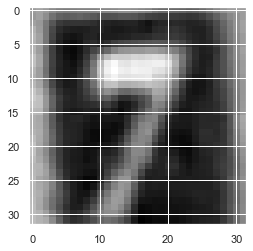

In [18]:
# Lets view another image 
#Lets choose some random data and view it 
print("Label: {}".format(Y_Train[2]))
plt.imshow(X_Train[2], cmap='gray')

Label: 4


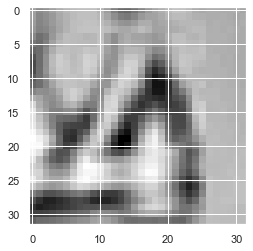

In [19]:
# Lets view another image 
#Lets choose some random data and view it 
print("Label: {}".format(Y_Train[3]))
plt.imshow(X_Train[3], cmap='gray')

In [20]:
# Blank Sapce

# Blank Space

## 2.0 Preparing Data for Neural Networks


### 2.1  Check Target Variable
-Is Data Balanced

In [21]:
Y_TrainDF=pd.DataFrame(Y_Train)

In [22]:
Y_TrainDF.isna().sum().sum()

0

In [23]:
Y_TrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       42000 non-null  int64
dtypes: int64(1)
memory usage: 328.2 KB


In [24]:
Y_TrainDF.iloc[:,0].value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
Name: 0, dtype: int64

<AxesSubplot:xlabel='0', ylabel='count'>

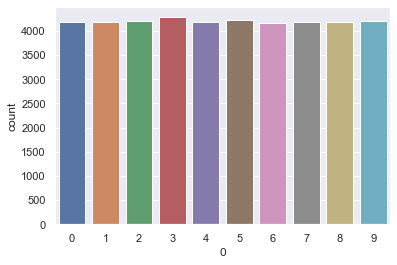

In [25]:
sns.countplot(Y_TrainDF.iloc[:,0])

In [26]:
# Classes are balanced

### 2.2  Convert to arrays and output to one hot vectors
- Convert data to numpy arrays
- Flatten all input arrays
- Convert output labels to One hot vectors

In [27]:
# Lets convert all Dataframes to arrays
NN_X_Train=np.array(X_Train)
NN_X_Test=np.array(X_Test)
NN_Y_Train=np.array(Y_Train)
NN_Y_Test=np.array(Y_Test)
NN_X_Val=np.array(X_Val)
NN_Y_Val=np.array(Y_Val)

# Display
NN_X_Train[0]
NN_Y_Train[0]
NN_X_Test[0]
NN_Y_Test[0]
NN_X_Val[0]
NN_Y_Val[0]

array([[ 33.0704,  30.2601,  26.852 ,  25.8844,  28.5421,  33.1673,
         33.9069,  31.277 ,  27.3313,  23.9556,  21.3518,  22.5258,
         24.2868,  31.2322,  37.2917,  38.1776,  30.8902,  24.4887,
         27.983 ,  23.3641,  19.7774,  23.0159,  24.7168,  24.9941,
         27.5701,  38.5474,  52.8341,  65.9037,  73.5609,  71.4471,
         58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765,  40.96  ,  54.0358,  60.7317,
         57.5965,  47.9611,  33.0103,  24.3362,  24.3793,  33.1997,
         44.1339,  61.1815,  80.5278,  86.1744,  79.7621,  66.5893,
         47.4926,  29.7548,  21.8804,  22.9943,  25.2822,  26.6303,
         39.7923,  64.9531,  91.0815, 108.8795, 113.6079, 113.0209,
        103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763,  69.6815,  91.8381, 101.2887,
         97.0719,  72.8832,  41.1944,  23.0975,  32.0319,  55.8077,
         82.2242, 104.4069, 113.9329, 116.5197, 117.7646, 111.6512,
         83.8758,  53.9974,  32.4664,  22.3256,  23.4179, 

2

array([[ 40.558 ,  46.7917,  48.9764,  55.0205,  67.3568,  71.6276,
         64.9102,  61.9536,  70.8064,  74.8831,  67.8083,  61.037 ,
         49.7114,  49.2599,  52.1887,  59.1387,  58.0787,  55.3671,
         57.769 ,  60.6547,  67.7419,  80.6652,  92.7349,  89.2083,
         90.8661,  99.3491, 106.9031, 109.1587, 112.2293, 112.1153,
        112.9904, 112.1646],
       [ 39.4379,  44.2911,  47.1768,  53.6015,  64.1121,  68.2581,
         62.7147,  63.5297,  75.7843,  81.4479,  71.5475,  59.7166,
         47.2062,  50.6511,  60.1987,  68.1163,  63.4265,  56.2423,
         57.6766,  62.2524,  67.6926,  81.0997,  91.3545,  88.931 ,
         91.1049,  99.2998, 106.0927, 108.5224, 110.6532, 111.0122,
        110.9475, 109.9368],
       [ 38.4488,  43.6394,  48.7098,  54.8572,  62.4112,  66.0734,
         60.3451,  62.046 ,  74.8984,  81.2029,  72.6444,  60.6286,
         47.5312,  52.0577,  63.448 ,  73.1867,  64.8563,  55.9712,
         57.1174,  62.747 ,  66.1165,  79.5667,  86.0669, 

1

array([[ 44.299 ,  45.9999,  51.3306,  52.7218,  49.4232,  44.9075,
         36.0332,  32.8594,  39.2717,  46.157 ,  49.0966,  44.6841,
         47.086 ,  50.5309,  54.8402,  60.2095,  59.6934,  60.4545,
         58.618 ,  47.3202,  35.0826,  28.6981,  28.199 ,  28.5427,
         26.9728,  28.3147,  28.2869,  26.8032,  24.6894,  25.2764,
         27.515 ,  27.156 ],
       [ 49.1351,  60.3081,  70.1222,  76.7086,  69.1115,  53.526 ,
         40.6243,  30.1954,  33.3091,  42.7812,  50.8513,  51.8081,
         58.5794,  70.1653,  80.36  ,  88.7891,  89.447 ,  91.0339,
         88.9093,  75.4268,  52.6571,  32.1322,  21.215 ,  19.5311,
         20.662 ,  25.3626,  27.3516,  25.5259,  23.4013,  23.7002,
         25.2378,  24.2918],
       [ 60.7595,  83.7141, 102.1961, 113.4939, 115.6077, 102.478 ,
         74.9799,  41.9985,  26.4453,  35.5045,  54.5905,  71.3886,
         88.2406, 106.6687, 117.7493, 121.6026, 124.8473, 127.733 ,
        125.4343, 112.6035,  86.9912,  53.4506,  26.8061, 

0

In [28]:
# Lets flatten all the input vectors

NN_X_Train.shape
NN_X_Test.shape
NN_X_Val.shape

NN_X_Train = NN_X_Train.reshape((NN_X_Train.shape[0], -1))
NN_X_Test = NN_X_Test.reshape((NN_X_Test.shape[0], -1))
NN_X_Val = NN_X_Val.reshape((NN_X_Val.shape[0], -1))

NN_X_Train.shape
NN_X_Test.shape
NN_X_Val.shape

(42000, 32, 32)

(18000, 32, 32)

(60000, 32, 32)

(42000, 1024)

(18000, 1024)

(60000, 1024)

In [29]:
# Lets convert all outputs to One hot vectors
#Converting our target variables to one hot vetors
from tensorflow.keras.utils import to_categorical

print("OG value of y_train:", NN_Y_Train[0])
print("OG  hot value of y_test:", NN_Y_Test[0])
print("OG hot value of y_val:", NN_Y_Val[0])

NN_Y_Train = to_categorical(NN_Y_Train, num_classes=10)
NN_Y_Test = to_categorical(NN_Y_Test, num_classes=10)
NN_Y_Val = to_categorical(NN_Y_Val, num_classes=10)


print("One hot value of y_train:", NN_Y_Train[0])
print("One hot value of y_test:", NN_Y_Test[0])
print("One hot value of y_val:", NN_Y_Val[0])


OG value of y_train: 2
OG  hot value of y_test: 1
OG hot value of y_val: 0
One hot value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
One hot value of y_test: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
One hot value of y_val: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


###  2.3 Normalisation/Scaling
#### Normalising input data before feeding into Neural Network

In [30]:
#Dividing by 255 to make it all between 0 1nd 1 
print(NN_X_Train.max())
print(NN_X_Train.min())

print(NN_X_Test.max())
print(NN_X_Test.min())

print(NN_X_Val.max())
print(NN_X_Val.min())



NN_X_Train=NN_X_Train/255.0
NN_X_Test=NN_X_Test/255.0
NN_X_Val= NN_X_Val/255.0

print(NN_X_Train.max())
print(NN_X_Train.min())

print(NN_X_Test.max())
print(NN_X_Test.min())

print(NN_X_Val.max())
print(NN_X_Val.min())

254.9745
0.0
254.9745
0.0
254.9745
0.0
0.9999
0.0
0.9999
0.0
0.9999
0.0


In [31]:
### Blank Space


### Blank Space

In [32]:
#Lets create a dataframe to store results from each FINAL model that we arrive at 
ResultsDF=pd.DataFrame(columns=['Model_Type','Train_Acc','Val_Acc','Test_Acc','Hidden layers','Hyper Params'])
ResultsDF

,Model_Type,Train_Acc,Val_Acc,Test_Acc,Hidden layers,Hyper Params


In [33]:
# Blank Space 

# Blank Space

## 3.0 Build Neural Network
-Start with building  a basic network  
-Based on results , see whether it should be tuned further
-Test The network


### Build a  model & Establish baseline score
- Start with 2 hidden layers
- We will go with best practices such as relu activation function , he s weights and adam optimizer(with lr =0.001)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 1024, units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=10,activation='softmax',kernel_initializer='he_normal'))

# Configuration for compiler
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam ,loss="categorical_crossentropy",metrics=['accuracy'])

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=4200,validation_data=(NN_X_Val,NN_Y_Val), callbacks=[mc])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 3.9340 - accuracy: 0.1027
Epoch 00001: val_accuracy improved from -inf to 0.10980, saving model to best_model.h5
10/10 [==============================] - 14s 1s/step - loss: 3.9340 - accuracy: 0.1027 - val_loss: 2.3403 - val_accuracy: 0.1098
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 2.3153 - accuracy: 0.1169
Epoch 00002: val_accuracy improved from 0.10980 to 0.16492, saving model to best_model.h5
10/10 [==============================] - 15s 2s/step - loss: 2.3153 - accuracy: 0.1169 - val_loss: 2.2887 - val_accuracy: 0.1649
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 2.2756 - accuracy: 0.1720
Epoch 00003: val_accuracy improved from 0.16492 to 0.18915, saving model to best_model.h5
10/10 [==============================] - 16s 2s/step - loss: 2.2756 - accuracy: 0.1720 - val_loss: 2.2486 - val_accuracy: 0.1892
Epoch 4/100
10/10 [==============================] - ETA: 0s 

In [40]:
####################################  Evaluate Model On Test Data ##############################################################

In [41]:
regressorModel.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

563/563 [==============================] - 6s 11ms/step - loss: 0.5868 - accuracy: 0.8372


[0.5867778062820435, 0.8371666669845581]

In [42]:
####################################  Evaluate Model On Test Data ##############################################################

In [46]:
best_train_score = max(historyRegressorModel.history['accuracy'])
best_val_score = max(historyRegressorModel.history['val_accuracy'])
print(best_train_score,best_val_score)

0.8841904997825623 0.8728500008583069


In [47]:
# Get the best model
from tensorflow.keras.models import load_model

saved_model = load_model('best_model.h5')

In [48]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Val),np.array(NN_Y_Val))

# Looks good

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4459 - accuracy: 0.8729


[0.44588539004325867, 0.8728500008583069]

In [49]:
#saved_model

In [50]:
# Lets Look at score on Test Data

(Test_Loss,Test_acc)=saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

563/563 [==============================] - 6s 10ms/step - loss: 0.5868 - accuracy: 0.8372 0s - loss: 0.5863 - accu


In [51]:
# Capturing best results from above epoch
#ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'Train_Acc':best_train_score,'Val_Acc':best_val_score,'Test_Acc':Test_acc,'Hidden layers':"3 layer(2048 units) with relu activation" ,'Hyper Params':'optimizer-Adam with lr 0.001,Weights-He'},ignore_index=True)
#ResultsDF

In [52]:
#ResultsDF

In [53]:
############ Blank Space 

########### Blank Space

### Enhance/ Tune  model & Capture accuracy
- Add a "third" hidden layer

In [54]:



# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 1024, units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=10,activation='softmax',kernel_initializer='he_normal'))

# Configuration for compiler
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam ,loss="categorical_crossentropy",metrics=['accuracy'])

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=4200,validation_data=(NN_X_Val,NN_Y_Val), callbacks=[mc])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 4.8047 - accuracy: 0.1000
Epoch 00001: val_accuracy improved from -inf to 0.10432, saving model to best_model.h5
10/10 [==============================] - 24s 2s/step - loss: 4.8047 - accuracy: 0.1000 - val_loss: 2.3271 - val_accuracy: 0.1043
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 2.3117 - accuracy: 0.1115
Epoch 00002: val_accuracy improved from 0.10432 to 0.15158, saving model to best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 2.3117 - accuracy: 0.1115 - val_loss: 2.3019 - val_accuracy: 0.1516
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 2.2890 - accuracy: 0.1459
Epoch 00003: val_accuracy improved from 0.15158 to 0.21523, saving model to best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 2.2890 - accuracy: 0.1459 - val_loss: 2.2671 - val_accuracy: 0.2152
Epoch 4/100
10/10 [==============================] - ETA: 0s 

In [55]:
####################################  Evaluate Model On Test Data ##############################################################

In [58]:
best_train_score = max(historyRegressorModel.history['accuracy'])
best_val_score = max(historyRegressorModel.history['val_accuracy'])
print(best_train_score,best_val_score)

0.979285717010498 0.9410333037376404


In [59]:
# Get the best model

saved_model = load_model('best_model.h5')

In [60]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Val),np.array(NN_Y_Val))

# Looks good

1875/1875 [==============================] - 32s 17ms/step - loss: 0.2604 - accuracy: 0.9410


[0.2604422867298126, 0.9410333037376404]

In [61]:
#saved_model

In [62]:
# Lets Look at score on Test Data

(Test_Loss,Test_acc)=saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

563/563 [==============================] - 10s 17ms/step - loss: 0.6800 - accuracy: 0.8471


In [63]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'Train_Acc':best_train_score,'Val_Acc':best_val_score,'Test_Acc':Test_acc,'Hidden layers':"3 layer(2048 units) with relu activation" ,'Hyper Params':'optimizer-Adam with lr 0.001,Weights-He'},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc,Test_Acc,Hidden layers,Hyper Params
0,Neural Network,0.9792857,0.9410333,0.8470556,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He"


In [64]:
############ Blank Space 

########### Blank Space

### L2 Regularization
- Check for various values of Lambda to look for bet results
- Since we are using L2  lets not use Batch normalisation here 

In [65]:


# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 1024, units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=2048,activation='relu',kernel_initializer='he_normal'))
regressorModel.add(Dense(units=10,activation='softmax',kernel_initializer='he_normal',kernel_regularizer='l2'))

# Configuration for compiler
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam ,loss="categorical_crossentropy",metrics=['accuracy'])

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=4200,validation_data=(NN_X_Val,NN_Y_Val), callbacks=[mc])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 4.9354 - accuracy: 0.1031
Epoch 00001: val_accuracy improved from -inf to 0.10015, saving model to best_model.h5
10/10 [==============================] - 25s 2s/step - loss: 4.9354 - accuracy: 0.1031 - val_loss: 2.5008 - val_accuracy: 0.1001
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 2.4717 - accuracy: 0.1118
Epoch 00002: val_accuracy improved from 0.10015 to 0.13975, saving model to best_model.h5
10/10 [==============================] - 25s 2s/step - loss: 2.4717 - accuracy: 0.1118 - val_loss: 2.4485 - val_accuracy: 0.1398
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 2.4341 - accuracy: 0.1409
Epoch 00003: val_accuracy improved from 0.13975 to 0.15893, saving model to best_model.h5
10/10 [==============================] - 25s 2s/step - loss: 2.4341 - accuracy: 0.1409 - val_loss: 2.4089 - val_accuracy: 0.1589
Epoch 4/100
10/10 [==============================] - ETA: 0s 

In [66]:
####################################  Evaluate Model On Test Data ##############################################################

In [67]:
best_train_score = max(historyRegressorModel.history['accuracy'])
best_val_score = max(historyRegressorModel.history['val_accuracy'])
print(best_train_score,best_val_score)

0.9444761872291565 0.916100025177002


In [68]:
# Get the best model

saved_model = load_model('best_model.h5')

In [69]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Val),np.array(NN_Y_Val))

# Looks good

1875/1875 [==============================] - 36s 19ms/step - loss: 0.3666 - accuracy: 0.9161


[0.36664631962776184, 0.916100025177002]

In [70]:
#saved_model

In [71]:
# Lets Look at score on Test Data

(Test_Loss,Test_acc)=saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

563/563 [==============================] - 11s 19ms/step - loss: 0.6168 - accuracy: 0.8511


In [72]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'Train_Acc':best_train_score,'Val_Acc':best_val_score,'Test_Acc':Test_acc,'Hidden layers':"3 layer(2048 units) with relu activation" ,'Hyper Params':'optimizer-Adam with lr 0.001,Weights-He,L2 Regularization'},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc,Test_Acc,Hidden layers,Hyper Params
0,Neural Network,0.9792857,0.9410333,0.8470556,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He"
1,Neural Network,0.9444762,0.9161000,0.8511111,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He,L2 Reg..."


In [73]:
# Not much improvement 

In [74]:
#### Blank Space


#### Blank Space

### Batch Normalisation
- Lets add Batch normalisation after every linearity 
- Everything else remains same

In [75]:
# Configuration for architecture
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Activation


# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 1024, units=2048,kernel_initializer='he_normal'))
regressorModel.add(BatchNormalization())  
regressorModel.add(Activation('relu'))  
regressorModel.add(Dense(units=2048,kernel_initializer='he_normal'))
regressorModel.add(BatchNormalization())  
regressorModel.add(Activation('relu'))  
regressorModel.add(Dense(units=2048,kernel_initializer='he_normal'))
regressorModel.add(BatchNormalization())  
regressorModel.add(Activation('relu'))  
regressorModel.add(Dense(units=10,activation='softmax',kernel_initializer='he_normal'))

# Configuration for compiler
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam ,loss="categorical_crossentropy",metrics=['accuracy'])

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=4200,validation_data=(NN_X_Val,NN_Y_Val), callbacks=[mc])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 2.6444 - accuracy: 0.3254
Epoch 00001: val_accuracy improved from -inf to 0.10532, saving model to best_model.h5
10/10 [==============================] - 42s 4s/step - loss: 2.6444 - accuracy: 0.3254 - val_loss: 4.7126 - val_accuracy: 0.1053
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.2425 - accuracy: 0.6060
Epoch 00002: val_accuracy improved from 0.10532 to 0.18565, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 1.2425 - accuracy: 0.6060 - val_loss: 2.9000 - val_accuracy: 0.1857
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.8995 - accuracy: 0.7214
Epoch 00003: val_accuracy did not improve from 0.18565
10/10 [==============================] - 40s 4s/step - loss: 0.8995 - accuracy: 0.7214 - val_loss: 3.0742 - val_accuracy: 0.1519
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.7206 - accuracy: 0.7762
E

In [76]:
####################################  Evaluate Model On Test Data ##############################################################

In [77]:
best_train_score = max(historyRegressorModel.history['accuracy'])
best_val_score = max(historyRegressorModel.history['val_accuracy'])
print(best_train_score,best_val_score)

0.9998809695243835 0.9355833530426025


In [78]:
# Get the best model

saved_model = load_model('best_model.h5')

In [79]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Val),np.array(NN_Y_Val))

# Looks good

1875/1875 [==============================] - 36s 19ms/step - loss: 0.3274 - accuracy: 0.9356


[0.32739704847335815, 0.9355833530426025]

In [80]:
#saved_model

In [81]:
# Lets Look at score on Test Data

(Test_Loss,Test_acc)=saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

563/563 [==============================] - 11s 19ms/step - loss: 0.9355 - accuracy: 0.8363


In [82]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'Train_Acc':best_train_score,'Val_Acc':best_val_score,'Test_Acc':Test_acc,'Hidden layers':"3 layer(2048 units) with relu activation" ,'Hyper Params':'optimizer-Adam with lr 0.001,Weights-He,Batch Normalisation'},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc,Test_Acc,Hidden layers,Hyper Params
0,Neural Network,0.9792857,0.9410333,0.8470556,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He"
1,Neural Network,0.9444762,0.9161000,0.8511111,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He,L2 Reg..."
2,Neural Network,0.9998810,0.9355834,0.8362778,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He,Batch ..."


In [83]:
# We are now in the overfit zone , lets try to regularize using L2 

In [84]:
#### Blank Space


#### Blank Space

### Drop Out
- Lets add Drop out for regulraization
- Batch normalisation will be removed
- Everything else remains same

In [85]:
# Configuration for architecture

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 1024, units=2048,kernel_initializer='he_normal'))
regressorModel.add(Activation('relu'))  
regressorModel.add(Dropout(0.2))
regressorModel.add(Dense(units=2048,kernel_initializer='he_normal')) 
regressorModel.add(Activation('relu'))  
regressorModel.add(Dropout(0.2))
regressorModel.add(Dense(units=2048,kernel_initializer='he_normal'))
regressorModel.add(Activation('relu'))  
regressorModel.add(Dropout(0.2))
regressorModel.add(Dense(units=10,activation='softmax',kernel_initializer='he_normal'))

# Configuration for compiler
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam ,loss="categorical_crossentropy",metrics=['accuracy'])

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=4200,validation_data=(NN_X_Val,NN_Y_Val), callbacks=[mc])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 4.2460 - accuracy: 0.1000
Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to best_model.h5
10/10 [==============================] - 32s 3s/step - loss: 4.2460 - accuracy: 0.1000 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 2.3138 - accuracy: 0.1009
Epoch 00002: val_accuracy improved from 0.10000 to 0.11217, saving model to best_model.h5
10/10 [==============================] - 31s 3s/step - loss: 2.3138 - accuracy: 0.1009 - val_loss: 2.3023 - val_accuracy: 0.1122
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.1059
Epoch 00003: val_accuracy did not improve from 0.11217
10/10 [==============================] - 31s 3s/step - loss: 2.3044 - accuracy: 0.1059 - val_loss: 2.3000 - val_accuracy: 0.1004
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 2.2990 - accuracy: 0.1161
E

In [86]:
####################################  Evaluate Model On Test Data ##############################################################

In [87]:
best_train_score = max(historyRegressorModel.history['accuracy'])
best_val_score = max(historyRegressorModel.history['val_accuracy'])
print(best_train_score,best_val_score)

0.9031428694725037 0.9280833601951599


In [88]:
# Get the best model

saved_model = load_model('best_model.h5')

In [89]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Val),np.array(NN_Y_Val))

# Looks good

1875/1875 [==============================] - 35s 19ms/step - loss: 0.2550 - accuracy: 0.9281


[0.25498467683792114, 0.9280833601951599]

In [90]:
#saved_model

In [91]:
# Lets Look at score on Test Data

(Test_Loss,Test_acc)=saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

563/563 [==============================] - 11s 20ms/step - loss: 0.4715 - accuracy: 0.8673


In [92]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'Train_Acc':best_train_score,'Val_Acc':best_val_score,'Test_Acc':Test_acc,'Hidden layers':"3 layer(2048 units) with relu activation" ,'Hyper Params':'optimizer-Adam with lr 0.001,Weights-He,Drop out'},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc,Test_Acc,Hidden layers,Hyper Params
0,Neural Network,0.9792857,0.9410333,0.8470556,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He"
1,Neural Network,0.9444762,0.9161000,0.8511111,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He,L2 Reg..."
2,Neural Network,0.9998810,0.9355834,0.8362778,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He,Batch ..."
3,Neural Network,0.9031429,0.9280834,0.8673334,3 layer(2048 units) with relu activation,"optimizer-Adam with lr 0.001,Weights-He,Drop out"


In [93]:
## Blank Space

## Blank Space

### Final Model & Result

#### We started off  with a 2 layer Neural Network model and were able to achieve a test accuracy of 83% to begin with               
#### Post that we began tuning the model wrt its various hyper paramters , results of which are displayed in the table above along with the hyper params used                                                                                               
#### We were able to bring up the Test Data accuracy to ~87% with the 4th trial as listed above and this will be chosen as the final model                
#### The final results are Train -90.3%, Validation -92.8% and Test Data -86.7%

In [37]:
########################################### Plot Train Vs Validation ########################################################## 

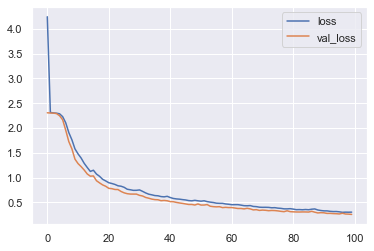

In [96]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

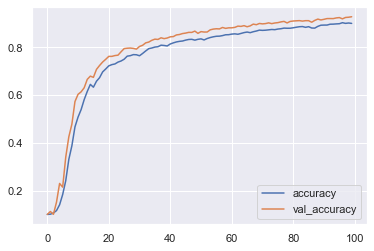

In [97]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['accuracy'], label='accuracy')
plt.plot(historyRegressorModel.history['val_accuracy'], label='val_accuracy')
plt.legend()

### Plot  Summary

#### From the Training loss Vs Validation Loss , we can see that there is smooth decrease is loss starting from the very first epoch and it continues to decrease right upto the last epoch
#### The model could have been trained further as the loss continues to decrease 
#### Both train and validtion performance is comparable and we cna clearly see that there is no overfit yet
#### A similar trend can be observed with the train Vs Validation accuracy hwere we can see that both sets can see a gradual increase in accuarcy upto the last epoch , further training could still be done 

### Pickle Model

In [99]:
model = saved_model
model.save('FinalModel')

INFO:tensorflow:Assets written to: FinalModel\assets
